# Use pandas-datareader Package to Get Financial Information
## ver 2.0

After a few experiments of last version, we decided to use alphavantage api to retrieve stock prices and pandas-datareader.BankOfCanadaReader to get economic indecis.

We want to focus on one stock in this project, which is Loblaw Companies Ltd (TSX:L)

In [1]:
#import packages
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import DataReader
from pandas_datareader.bankofcanada import BankOfCanadaReader

from datetime import date
import requests

import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

## 1. Read the stock prices of Loblaw Companies Ltd

In [3]:
def get_stock(symbol):
    '''
    Get stock daily adjuested close price and volume using alphavantage API
    '''
    apikey = "39ID5KS0RJQLNZGL"
    base_url = "https://www.alphavantage.co/query?"
    function = "TIME_SERIES_DAILY_ADJUSTED"
    outputsize = "full"
    
    #construct the api url
    url = base_url + "function={}&symbol={}&outputsize={}&apikey={}".format(
    function, symbol, outputsize, apikey)

    r = requests.get(url)
    
    #parse the result, change the datatypes 
    try:
        df = pd.DataFrame(r.json()['Time Series (Daily)']).transpose(
            )[['5. adjusted close','6. volume']].reset_index()
    except:
        print("Cannot get stock price")
        return None
    df.columns = ['date','price','volume']
    df['date'] = pd.to_datetime(df['date'])
    df['price'] = pd.to_numeric(df['price'])
    df['volume'] = pd.to_numeric(df['volume'])
    df = df.set_index('date')
    
    print("Successfully read stock price: {}, from {} to {}".format(symbol, df.index[-1], df.index[0]))
    return df

In [39]:
#Loblaw Companies Limited is the largest Canadian food retailer
loblaw = get_stock("TSX:L")
#Metro Inc., a Canadian food retailer 
metro = get_stock("TSX:MRU")
#Empire Company Limited, the parent company of Sobeys, another Canadian food retailer
empa = get_stock("EMP-A.TO")
#George Weston Limited, a Canadian food processing and distribution company
gwl = get_stock("TSE:WN")
#Alimentation Couche-Tard, a Candian multinational operator of convenience stores
atd = get_stock("ATD-B.TO")
#S&P/TSX composite index, the benchmark Canadian index representing roughly 70% of the total market capitalization of the TSE companies
tsx = get_stock("^GSPTSE")
#S&P500, the stock market index that measures the stock performance of 500 large companies listed on stock exchanges of the US
sp500 = get_stock("^GSPC")

Successfully read stock price: TSX:L, from 2000-01-04 00:00:00 to 2019-10-18 00:00:00
Successfully read stock price: TSX:MRU, from 2000-01-03 00:00:00 to 2019-10-18 00:00:00
Successfully read stock price: EMP-A.TO, from 2000-01-03 00:00:00 to 2019-10-18 00:00:00
Successfully read stock price: TSE:WN, from 2000-01-04 00:00:00 to 2019-10-18 00:00:00
Successfully read stock price: ATD-B.TO, from 2000-01-03 00:00:00 to 2019-10-18 00:00:00
Successfully read stock price: ^GSPTSE, from 2000-01-03 00:00:00 to 2019-10-18 00:00:00
Successfully read stock price: ^GSPC, from 2000-01-03 00:00:00 to 2019-10-18 00:00:00


In [44]:
pd.concat([loblaw,metro,empa,gwl,atd,tsx,sp500],axis=1).head()

,price,volume,price,volume,price,volume,price,volume,price,volume,price,volume,price,volume
date,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,1.3450,0.0,2.0835,0.0,NaN,NaN,0.2819,0.0,8413.7998,0.0,1455.22,9.318000e+08
2000-01-04,19.4276,206500.0,1.2985,408600.0,2.0291,29580.0,36.0663,42300.0,0.2785,4378560.0,8202.5996,59509800.0,1399.42,1.009000e+09
2000-01-05,19.0556,745400.0,1.2842,1126200.0,1.9929,242082.0,35.1951,144500.0,0.2785,369600.0,8119.3999,94545700.0,1402.11,1.085500e+09
2000-01-06,18.6264,186100.0,1.2591,1123200.0,2.0291,69780.0,33.4528,69500.0,0.2771,228000.0,8114.2002,79690100.0,1403.45,1.092300e+09
2000-01-07,18.3689,215900.0,1.2591,400200.0,2.0110,39300.0,34.2543,47800.0,0.2771,445200.0,8429.4004,87693100.0,1441.47,1.225200e+09


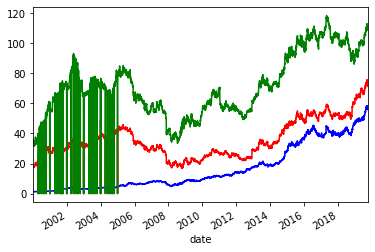

In [9]:
loblaw.price.plot(color = 'red')
metro.price.plot(color = 'blue')
gwl.price.plot(color = 'green')

In [15]:
loblaw.price.corr(loblaw.volume)

0.10212279042448116

## 2. Get the important indices

We can find the major economical indices through the API of bank of canada.   
https://www.bankofcanada.ca/valet/docs  
  
base url = "https://www.bankofcanada.ca/valet/"

To get the list of all groups: base url + "/lists/groups"  
To get the list of all series: base url + "/lists/series"  
To get the list of all series in a group: base url + "groups/groupname"  
To get the date from a series: base url + "observations/seriesname"  

Search for the key words in the group list, get the details, and retrieve the data using series name.

We use the following indices:  
series      |   groupname           |   description             |   date      
FXUSDCAD    | FX_RATES_DAILY        |USD/CAD exchange rate  | 2017-1-1, 2019-10-11  
IEXE0102    | LEGACY_CLOSING_RATES  |USD/CAD exchange rate  | 2007-5-1, 2019-4-30  
V80691311   | CHARTED_BANK_INTEREST |prime rate             | 2000-1-1, 2019-10-11  
V41690973   | CPI_MONTHLY           |consumer price index   | 2000-1, 2019-8  
W.BCPI      | BCPI_WEEKLY           |business CPI           | 2000-1-1, 2019-9-25

CEER - Canadian-dollar Effective Exchange Rate, formerly CERI - Canadian-dollar Effective Exchange Rate Index, was downloaded seperately from Bank of Canada website.  (1999-1-1 , 2019-10-11)

https://www.bankofcanada.ca/rates/exchange/canadian-effective-exchange-rates/#Overview


In [16]:
r = requests.get("https://www.bankofcanada.ca/valet/lists/groups/json")
grouplist = pd.DataFrame(r.json()['groups']).transpose()

In [17]:
grouplist[grouplist['label'].str.contains('exchange', case=False)]

,label,link
FX_RATES_RECIPROCAL,Daily reciprocal exchange rates,https://www.bankofcanada.ca/valet/groups/FX_RATES_RECIPROCAL
FX_RATES_DAILY,Daily exchange rates,https://www.bankofcanada.ca/valet/groups/FX_RATES_DAILY
FX_RATES_MONTHLY,Monthly exchange rates,https://www.bankofcanada.ca/valet/groups/FX_RATES_MONTHLY
FX_RATES_ANNUAL,Annual exchange rates,https://www.bankofcanada.ca/valet/groups/FX_RATES_ANNUAL
SWP-USCANPFX,U.S. / CAD nominal exchange rate,https://www.bankofcanada.ca/valet/groups/SWP-USCANPFX
SAN_JABS20181014,The Impact of Surprising Monetary Policy Announcements on Exchange Rate Volatility,https://www.bankofcanada.ca/valet/groups/SAN_JABS20181014
SAN_AROO20190815,Using Exchange-Traded Funds to Measure Liquidity in the Canadian Corporate Bond Market,https://www.bankofcanada.ca/valet/groups/SAN_AROO20190815


In [30]:
group_name = "FX_RATES_DAILY"
r = requests.get("https://www.bankofcanada.ca/valet/groups/{}/json".format(group_name))
pd.DataFrame(r.json()['groupDetails']).head()

,name,label,description,groupSeries
FXAUDCAD,FX_RATES_DAILY,Daily exchange rates,Daily average exchange rates - published once each business day by 16:30 ET. All Bank of Canada exchange rates are indicative rates only.,"{'label': 'AUD/CAD', 'link': 'https://www.bankofcanada.ca/valet/series/FXAUDCAD'}"
FXBRLCAD,FX_RATES_DAILY,Daily exchange rates,Daily average exchange rates - published once each business day by 16:30 ET. All Bank of Canada exchange rates are indicative rates only.,"{'label': 'BRL/CAD', 'link': 'https://www.bankofcanada.ca/valet/series/FXBRLCAD'}"
FXCHFCAD,FX_RATES_DAILY,Daily exchange rates,Daily average exchange rates - published once each business day by 16:30 ET. All Bank of Canada exchange rates are indicative rates only.,"{'label': 'CHF/CAD', 'link': 'https://www.bankofcanada.ca/valet/series/FXCHFCAD'}"
FXCNYCAD,FX_RATES_DAILY,Daily exchange rates,Daily average exchange rates - published once each business day by 16:30 ET. All Bank of Canada exchange rates are indicative rates only.,"{'label': 'CNY/CAD', 'link': 'https://www.bankofcanada.ca/valet/series/FXCNYCAD'}"
FXEURCAD,FX_RATES_DAILY,Daily exchange rates,Daily average exchange rates - published once each business day by 16:30 ET. All Bank of Canada exchange rates are indicative rates only.,"{'label': 'EUR/CAD', 'link': 'https://www.bankofcanada.ca/valet/series/FXEURCAD'}"


In [27]:
symbol = "W.BCPI"
start = date(2000,1,1)
end = date(2019,9,30)
reader = BankOfCanadaReader(symbol, start = start, end = end)
BCPI = reader.read()
print(BCPI.head(20))
print(BCPI.tail())

W.BCPI
\ndate"           
2019-09-25  R     
2019-09-18  R     
2019-09-11  R     
2019-09-04  R     
2019-08-28  R     
2019-08-07  R     
2019-06-05  R     
2019-05-29  R     
2019-05-22  R     
2019-05-15  R     
2019-05-08  R     
2019-05-01  R     
date        W.BCPI
REVISIONS   NaN   
2019-09-25  432.33
2019-09-18  433.06
2019-09-11  428.60
2019-09-04  421.88
2019-08-28  417.90
2019-08-21  419.39
            W.BCPI
\ndate"           
2000-02-02  305.83
2000-01-26  302.82
2000-01-19  295.11
2000-01-12  284.80
2000-01-05  284.90


In [25]:
symbol = "V41690973"
start = date(2000,1,1)
end = date(2019,9,30)
reader = BankOfCanadaReader(symbol, start = start, end = end)
CPI = reader.read()
print(CPI.head())
print(CPI.tail())

V41690973
\ndate"              
2019-08-01  136.8    
2019-07-01  137.0    
2019-06-01  136.3    
2019-05-01  136.6    
2019-04-01  136.0    
            V41690973
\ndate"              
2000-05-01  94.9     
2000-04-01  94.5     
2000-03-01  94.8     
2000-02-01  94.1     
2000-01-01  93.5     


In [31]:
symbol = "V80691311"
start = date(2000,1,1)
end = date(2019,9,30)
reader = BankOfCanadaReader(symbol, start = start, end = end)
bank_interest = reader.read()
print(bank_interest.head())
print(bank_interest.tail())

V80691311
\ndate"              
2019-09-25  3.95     
2019-09-18  3.95     
2019-09-11  3.95     
2019-09-04  3.95     
2019-08-28  3.95     
            V80691311
\ndate"              
2000-02-02  6.5      
2000-01-26  6.5      
2000-01-19  6.5      
2000-01-12  6.5      
2000-01-05  6.5      


In [21]:
CEER = pd.read_csv("learn/coursera_advanced_data_science_capstone/CEER.csv", parse_dates=['date'])
print(CEER.head())
print(CEER.tail())

date  CEER_BROADN
0 1999-01-01  95.43      
1 1999-01-04  95.47      
2 1999-01-05  95.84      
3 1999-01-06  96.66      
4 1999-01-07  96.46      
           date  CEER_BROADN
5416 2019-10-07  117.16     
5417 2019-10-08  117.08     
5418 2019-10-09  117.03     
5419 2019-10-10  117.15     
5420 2019-10-11  117.75     


## 3. Get google trend data

Here we downloaded google trend data manually. We will change it to using pytrend package in the future.  
The keywords are: grocery store, loblaws, stock


In [37]:
trend_grocery_store = pd.read_csv("learn/coursera_advanced_data_science_capstone/grocery_store-trend.csv", parse_dates=['Month'], skiprows=2)
print(trend_grocery_store.head())
print(trend_grocery_store.tail())

Month  Grocery store: (Canada)
0 2004-01-01  47                     
1 2004-02-01  44                     
2 2004-03-01  41                     
3 2004-04-01  39                     
4 2004-05-01  40                     
         Month  Grocery store: (Canada)
185 2019-06-01  85                     
186 2019-07-01  98                     
187 2019-08-01  100                    
188 2019-09-01  87                     
189 2019-10-01  80                     


In [39]:
trend_loblaws = pd.read_csv("learn/coursera_advanced_data_science_capstone/loblaws-trend.csv", parse_dates=['Month'], skiprows=2)
print(trend_loblaws.head())
print(trend_loblaws.tail())

Month  Loblaws: (Canada)
0 2004-01-01  27               
1 2004-02-01  27               
2 2004-03-01  24               
3 2004-04-01  26               
4 2004-05-01  29               
         Month  Loblaws: (Canada)
185 2019-06-01  37               
186 2019-07-01  37               
187 2019-08-01  37               
188 2019-09-01  35               
189 2019-10-01  34               


In [40]:
trend_stock = pd.read_csv("learn/coursera_advanced_data_science_capstone/stock-trend.csv", parse_dates=['Month'], skiprows=2)
print(trend_stock.head())
print(trend_stock.tail())

Month  Stock: (Canada)
0 2004-01-01  17             
1 2004-02-01  17             
2 2004-03-01  15             
3 2004-04-01  14             
4 2004-05-01  13             
         Month  Stock: (Canada)
185 2019-06-01  65             
186 2019-07-01  68             
187 2019-08-01  74             
188 2019-09-01  63             
189 2019-10-01  64             
